In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/sanakulov/Personal/projects/ml2/ml2/DATA/hearing_test.csv')

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df['test_result'].value_counts()

test_result
1    3000
0    2000
Name: count, dtype: int64

<Axes: xlabel='test_result', ylabel='count'>

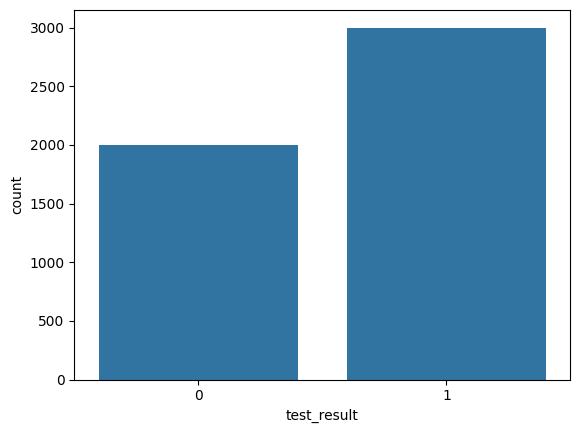

In [6]:
sns.countplot(data = df, x = 'test_result')

<Axes: xlabel='test_result', ylabel='age'>

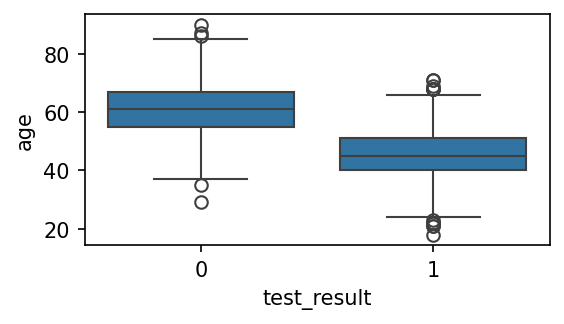

In [7]:
plt.figure(dpi=150, figsize=(4,2))
sns.boxplot(data=df, x='test_result', y='age')

<Axes: xlabel='test_result', ylabel='physical_score'>

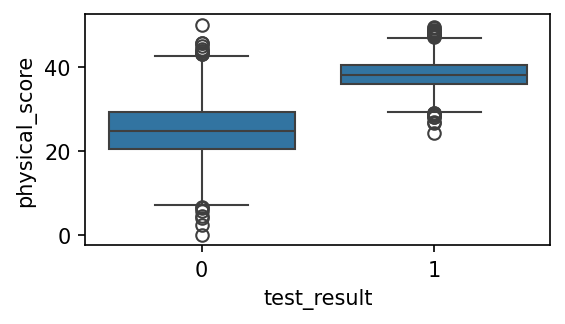

In [8]:
plt.figure(dpi=150, figsize=(4,2))
sns.boxplot(data=df, x='test_result', y='physical_score')

<Axes: xlabel='age', ylabel='physical_score'>

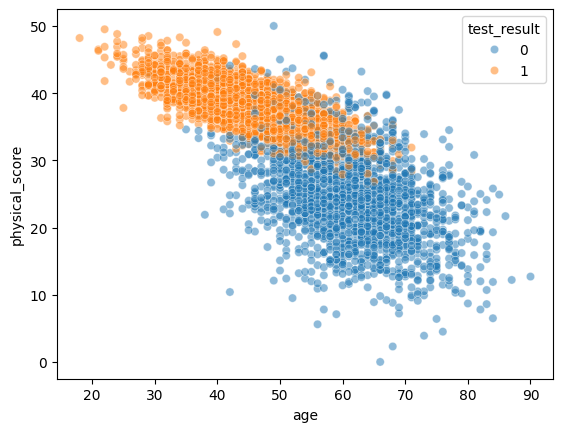

In [9]:
plt.figure(dpi=100)
sns.scatterplot(data=df,x='age',y='physical_score', hue='test_result', alpha=0.5)

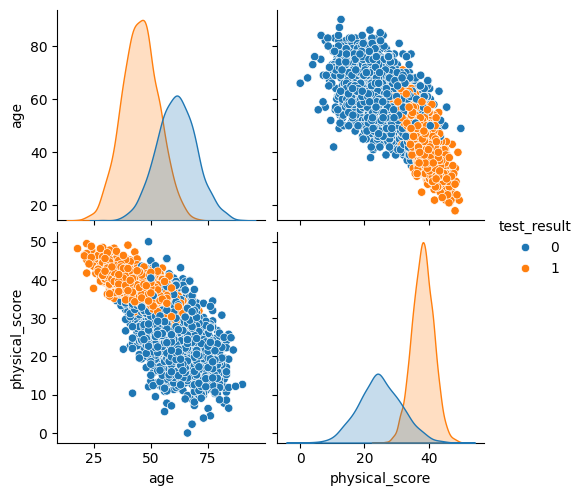

In [10]:
sns.pairplot(data=df,hue='test_result')

<Axes: >

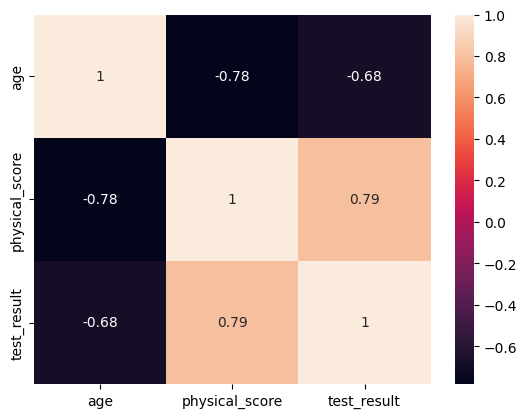

In [11]:
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='physical_score', ylabel='test_result'>

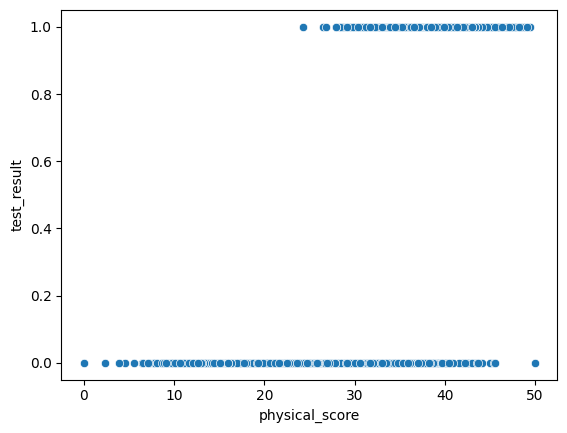

In [12]:
# Когда работаем с категориальными признаками не всегда будет хватать визуализации. Попробуем нарисовать трехмерные графики.
sns.scatterplot(data=df, x='physical_score',y='test_result')

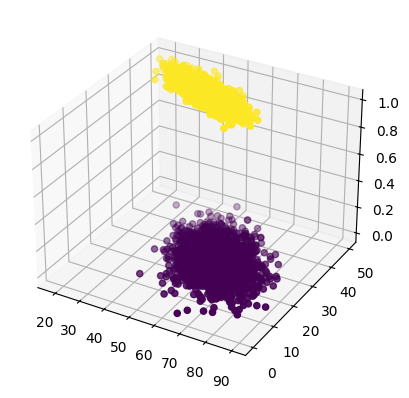

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(df['age'], df['physical_score'], df['test_result'], c=df['test_result'])

In [14]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [15]:
X = df.drop('test_result', axis=1)
y = df['test_result']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)

In [20]:
scaled_X_test = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
help(LogisticRegression)

Help on class LogisticRegression in module sklearn.linear_model._logistic:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(
 |      penalty='l2',
 |      *,
 |      dual=False,
 |      tol=0.0001,
 |      C=1.0,
 |      fit_intercept=True,
 |      intercept_scaling=1,
 |      class_weight=None,
 |      random_state=None,
 |      solver='lbfgs',
 |      max_iter=100,
 |      multi_class='deprecated',
 |      verbose=0,
 |      warm_start=False,
 |      n_jobs=None,
 |      l1_ratio=None
 |  )
 |
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [25]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [26]:
y_pred = log_model.predict(scaled_X_test)

In [27]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [28]:
y_pred_proba = log_model.predict_proba(scaled_X_test) # proba от probability

In [29]:
y_pred_proba #посмотрим на вероятности принадлежности к классу 0 и вероятность принадлежности к классу 1

array([[2.38051656e-02, 9.76194834e-01],
       [2.68854070e-02, 9.73114593e-01],
       [9.89220033e-01, 1.07799673e-02],
       [1.90238747e-03, 9.98097613e-01],
       [9.75065740e-01, 2.49342602e-02],
       [9.89676918e-01, 1.03230822e-02],
       [7.39558885e-02, 9.26044112e-01],
       [1.70641117e-02, 9.82935888e-01],
       [9.97075399e-01, 2.92460122e-03],
       [3.30092529e-02, 9.66990747e-01],
       [8.30393770e-02, 9.16960623e-01],
       [9.90796129e-03, 9.90092039e-01],
       [7.07374696e-03, 9.92926253e-01],
       [9.34320413e-01, 6.56795867e-02],
       [1.16096233e-04, 9.99883904e-01],
       [6.58212248e-02, 9.34178775e-01],
       [9.89155494e-01, 1.08445064e-02],
       [2.79291486e-03, 9.97207085e-01],
       [5.57001286e-04, 9.99442999e-01],
       [9.96534179e-01, 3.46582117e-03],
       [8.81902000e-01, 1.18098000e-01],
       [1.30963044e-01, 8.69036956e-01],
       [5.45789772e-01, 4.54210228e-01],
       [3.43636758e-02, 9.65636324e-01],
       [3.984685

In [30]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [31]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [34]:
y_test

1718    1
2511    1
345     0
2521    1
54      0
       ..
4770    1
188     1
3335    0
4583    0
3208    0
Name: test_result, Length: 500, dtype: int64

In [35]:
y_pred = log_model.predict(scaled_X_test)

In [36]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [37]:
accuracy_score(y_test, y_pred)

0.93

In [38]:
confusion_matrix(y_test, y_pred)

array([[172,  21],
       [ 14, 293]])

In [41]:
# матрицу можно и визуализировать
from sklearn.metrics import ConfusionMatrixDisplay

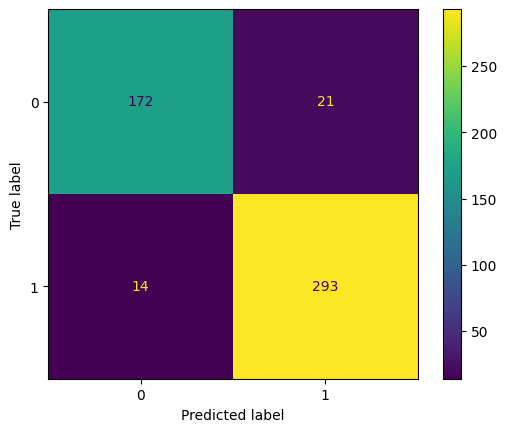

In [44]:
# эта функция и сама предскажет, и сама свизуализирует
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test)
# тут смотрим, чтобы TP и TN сильно отличались от FP и FN. но можно и нормализовать

In [48]:
len(y_test)

500

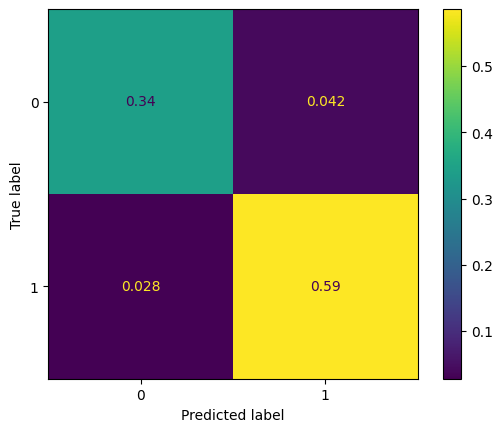

In [46]:
# эта функция и сама предскажет, и сама свизуализирует
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize='all')
# тут смотрим, чтобы TP и TN сильно отличались от FP и FN. но можно и нормализовать

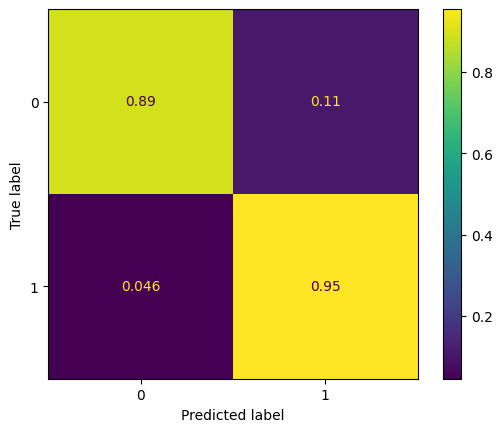

In [47]:
# эта функция и сама предскажет, и сама свизуализирует
ConfusionMatrixDisplay.from_estimator(log_model, scaled_X_test, y_test, normalize='true')
# тут смотрим, чтобы TP и TN сильно отличались от FP и FN. но можно и нормализовать

In [51]:
print(classification_report(y_test, y_pred))
#macro avg и weighted avg нужны для того, когда классы сильно не сбалансированны

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [52]:
from sklearn.metrics import precision_score, recall_score

In [53]:
# общая метрика
precision_score(y_test, y_pred)

np.float64(0.9331210191082803)

In [54]:
# общая метрика
recall_score(y_test, y_pred)

np.float64(0.9543973941368078)

In [57]:
# Вместо plot_precision_recall_curve в новой версии есть PrecisionRecallDisplay.from_estimator и PrecisionRecallDisplay.from_predictions
# Вместо plot_roc_curve в новой версии есть RocCurveDisplay.from_estimator и RocCurveDisplay.from_predictions
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay

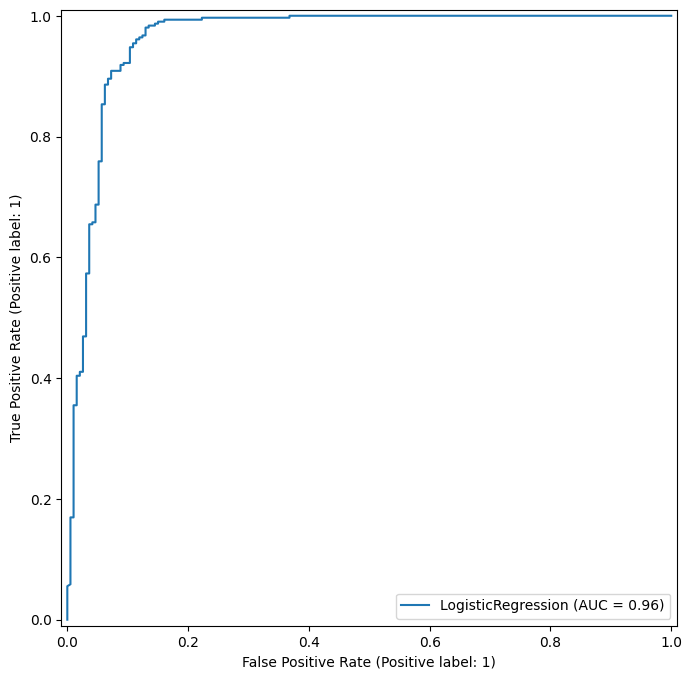

In [60]:
fig, ax = plt.subplots(figsize=(12,8))
RocCurveDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

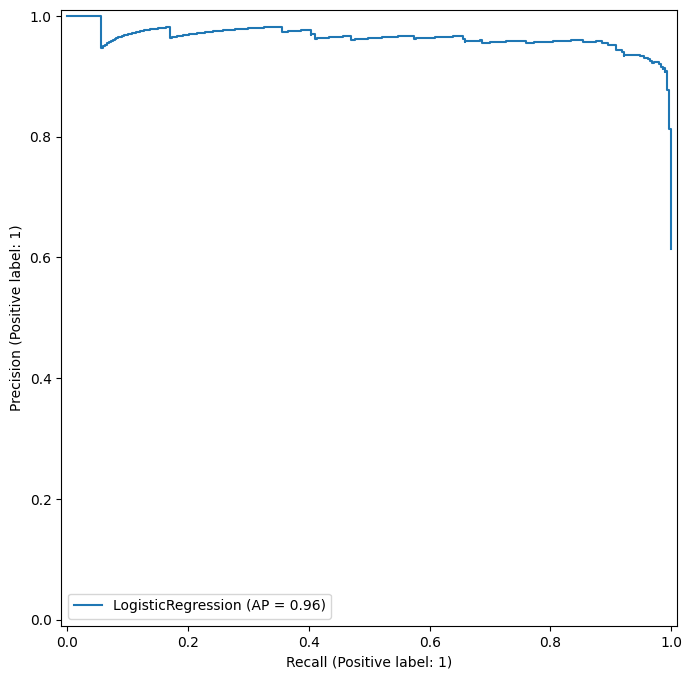

In [61]:
fig, ax = plt.subplots(figsize=(12,8))
PrecisionRecallDisplay.from_estimator(log_model, scaled_X_test, y_test, ax=ax)

In [63]:
# получаем вероятности принадлежности к какому-то классу
log_model.predict_proba(scaled_X_test)[0]

array([0.02380517, 0.97619483])

In [64]:
y_test[0]

np.int64(1)

In [65]:
log_model.predict(scaled_X_test)[0]

np.int64(1)